https://www.kaggle.com/datasets/lampubhutia/nyc-flight-delay

In [1]:
# importing main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**import pandas as pd:** This line imports the pandas library, which is a powerful library for data manipulation and analysis. It is commonly aliased as pd for convenience in coding.

**import numpy as np:** This line imports the numpy library, which provides support for numerical operations and arrays. It is often aliased as np.

**import matplotlib.pyplot as plt:** This line imports the pyplot module from the matplotlib library, which is used for creating static, animated, and interactive visualizations in Python. It is aliased as plt for convenience.

**import seaborn as sns:** This line imports the seaborn library, which is built on top of matplotlib and provides a high-level interface for creating informative and attractive statistical graphics. Seaborn is often aliased as sns.

In [2]:
# reading our dataframe
df = pd.read_csv("C:\\Users\\aiman\\Downloads\\NYC-flights\\flight_data.csv")
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [3]:
df.shape

(336776, 19)

In [4]:
#I would now want to check a basic summary of my dataset.
#The info function displays some important information about dataset like non-nulls counts, dtype, column name and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

Flights dataset is having  336776 rows and  19  columns which is big enough for an excel file to handle/process sometimes
now from above view we can see we have 19 columns in the dataset which i will define as below (based on my general understanding of this dataset on first look)

Dataset Details

1. year - Year of Flight  
2. month - Month of Flight  
3.  day - Day (number of Flight)  
4.  dep_time - Departure Time  
5.  sched_dep_time - Scheduled Departure Time  
6.  dep_delay - Departure Delay (in Minutes)  
7.  arr_time - Arrival Time  
8.  sched_arr_time - Scheduled Arrival Time  
9.  arr_delay - Arrival Delay (in Minutes)
10. carrier- Carrier Details of Flight  
11. flight - Flight Name  
12. tailnum - Tailnumber of Flight  
13. origin - Origin of Flight  
14. dest - Destination Airport Name  
15. air_time - Air Time (Time in Air - travel Time ( in minutes) )  
16. distance - Distance (assuming in miles?)    
17. hour - Hour  
18. minute - minute   
19. time_hour - time hour  

Here are the airline codes and their corresponding names:

'F9': Frontier Airlines  
'FL': AirTran Airways (Note: AirTran Airways was acquired by Southwest Airlines and no longer operates under this code)  
'EV': ExpressJet Airlines  
'YV': Mesa Airlines (doing business as United Express and American Eagle)  
'OO': SkyWest Airlines (doing business as United Express, Delta Connection, American Eagle, and Alaska SkyWest)  
'MQ': Envoy Air (formerly American Eagle Airlines)  
'WN': Southwest Airlines  
'B6': JetBlue Airways  
'9E': Endeavor Air (formerly Pinnacle Airlines, doing business as Delta Connection)  
'UA': United Airlines  
'US': US Airways (Note: US Airways merged with American Airlines and no longer operates under this code)  
'VX': Virgin America (Note: Virgin America was acquired by Alaska Airlines and no longer operates under this code)  
'DL': Delta Air Lines  
'AA': American Airlines  
'HA': Hawaiian Airlines  
'AS': Alaska Airlines  

In [5]:
#I would now like to see a descriptive analysis of my dataset. For this I use a describe function.

df.describe()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


count: The number of non-null (non-missing) values in the column.

mean: The mean (average) value of the column.

std: The standard deviation, which measures the spread or dispersion of the values.

min: The minimum value in the column.

25%: The 25th percentile value, which represents the value below which 25% of the data falls.

50%: The median or 50th percentile value, which represents the middle value of the data.

75%: The 75th percentile value, which represents the value below which 75% of the data falls.

max: The maximum value in the column

The describe functions helps us to know various important information about our dataset. As we can observe below, this function has provided us the count, mean, standard deviation, minimum and maximum values, upper, middle and lower quartiles for each attributes. We shall notice that these calculations has only been performed on the numerical columns of the dataset.

Well before proceeding ahead i would like to check the null values in the dataset which cause the incorrect analysis we have multiple options to treat the null values

1. Remove them (Simplest option)  
2. Impute null/missing values with aveage or previous values (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)


Let's go with the simple and best option considering we dont have much business/domain knowledge readily available with us, so lets check NULL values first and then kick them off of the dataset

In [6]:
##How many years data we have , seems like only for 2013

df['year'].unique()


array([2013], dtype=int64)

In [7]:
#12 months data 

df['month'].unique()


array([ 1, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [8]:
#To find if missing values are present in my dataset I use isnull function. 

df.isnull()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,False,False,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False
336772,False,False,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False
336773,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False
336774,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False


In [9]:
#Simple function to check Null values in each column in the dataset

def check_NullValues():
    out=df.isnull().sum()
    found=0
    for counter in out.index:
        if out[counter]>0:
            found=found+1
            print( "column", counter , " is having ",out[counter] , "Null values")


    if(found==0):
        print("No Null values found in dataframe")

In [10]:
#Show Null value columns alongwith quantity of Null values 
check_NullValues()

column dep_time  is having  8255 Null values
column dep_delay  is having  8255 Null values
column arr_time  is having  8713 Null values
column arr_delay  is having  9430 Null values
column tailnum  is having  2512 Null values
column air_time  is having  9430 Null values


In [11]:
#Drop Null Values
df.dropna(axis=0,how ='any', inplace=True)

#Drop the columns that i dont need for my analysis to reduce the processing time/power
df.drop(axis=1,columns=['dep_time','sched_dep_time','sched_arr_time','arr_time','time_hour'],inplace=True)

df.dropna(axis=0, how='any', inplace=True): This line is dropping rows (axis=0) that contain any missing values (NaN) in any of their columns. The how='any' argument means that if any NaN value is found in a row, that entire row will be dropped. The inplace=True argument means that this operation will modify the DataFrame df in place, and it won't return a new DataFrame. This operation effectively removes rows with missing data.


df.drop(axis=1, columns=['dep_time', 'sched_dep_time', 'sched_arr_time', 'arr_time', 'time_hour'], inplace=True): This line is dropping specific columns from the DataFrame. The axis=1 argument indicates that you're dropping columns (as opposed to rows). The columns argument specifies a list of column names that you want to remove from the DataFrame. In this case, it's removing the columns 'dep_time', 'sched_dep_time', 'sched_arr_time', 'arr_time', and 'time_hour'. Like before, the inplace=True argument modifies the DataFrame in place.

In [12]:
df.head()

,year,month,day,dep_delay,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,2.0,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
1,2013,1,1,4.0,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2,2013,1,1,2.0,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
3,2013,1,1,-1.0,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
4,2013,1,1,-6.0,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0


In [13]:
#Let's call null value check function again to check if we still have any null values. i know it shouldnt be but playing by calling function again to test it 
check_NullValues()

No Null values found in dataframe


In [14]:
#call shape to identify the rows and columns of the dataset
print('Flights dataset is having ',df.shape[0] , 'rows now and ',df.shape[1],' columns as we have dropped 5 columns also ')
print('this dataset is simple dataset which doesnt need much of cleaning/prep unlike real world dataset where we need to spend so much of time in data preparations')

Flights dataset is having  327346 rows now and  14  columns as we have dropped 5 columns also 
this dataset is simple dataset which doesnt need much of cleaning/prep unlike real world dataset where we need to spend so much of time in data preparations


In [15]:
correlation_matrix = df.corr()


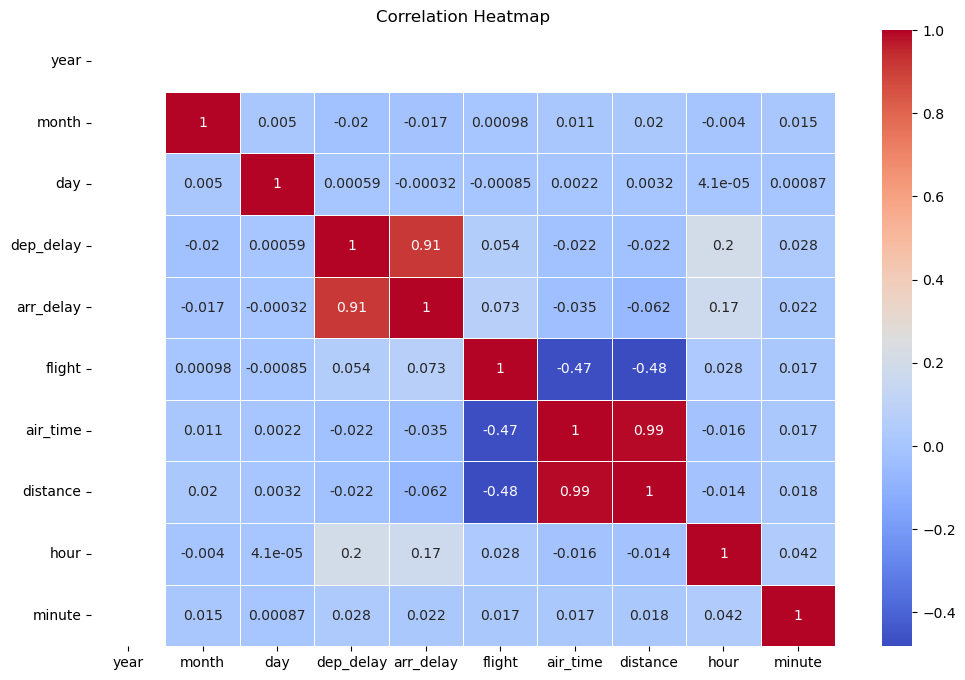

In [16]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

the heatmap using Seaborn's heatmap() function. You can customize the appearance of the heatmap as needed

corr() is a pandas DataFrame method that calculates the pairwise Pearson correlation coefficients between the numeric columns in the DataFrame.

correlation_matrix: The correlation matrix you calculated 
    
annot=True: This adds the correlation values to the cells of the heatmap.

cmap="coolwarm": The colormap to use for the heatmap. You can choose different colormaps depending on your preferences.

linewidths=.5: Specifies the width of the lines between cells in the heatmap.

It will generate a heatmap that visually represents the correlations between the numeric columns in your DataFrame, making it easier to identify relationships between variables. Adjust the figure size and other parameters to suit your preferences and visualization needs.

#### Number of Flights from different Airports



C:\Users\aiman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


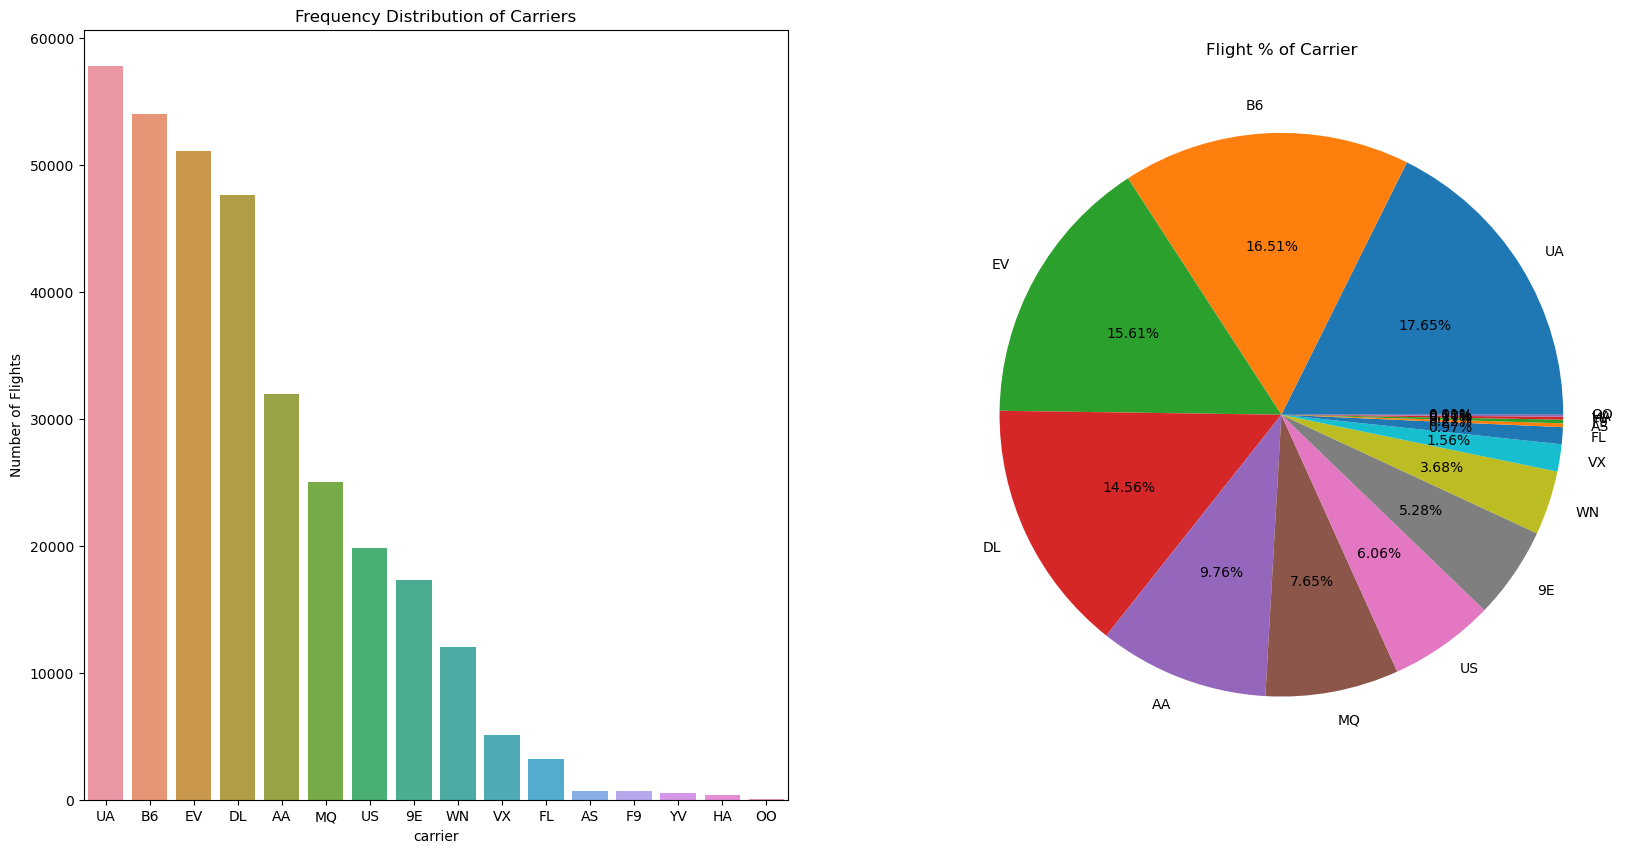

In [17]:
#Graphical representation of carriers scheduled flights in numbers and %

f,ax=plt.subplots(1,2,figsize=(20,10))
df['carrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Flight % of Carrier')
ax[1].set_ylabel('')
sns.countplot('carrier',order = df['carrier'].value_counts().index, data=df,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')
plt.show()

## flight count and percentage based on origin

The primary airports in NYC are John F. Kennedy International Airport (JFK), LaGuardia Airport (LGA), and Newark Liberty International Airport (EWR). 

C:\Users\aiman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


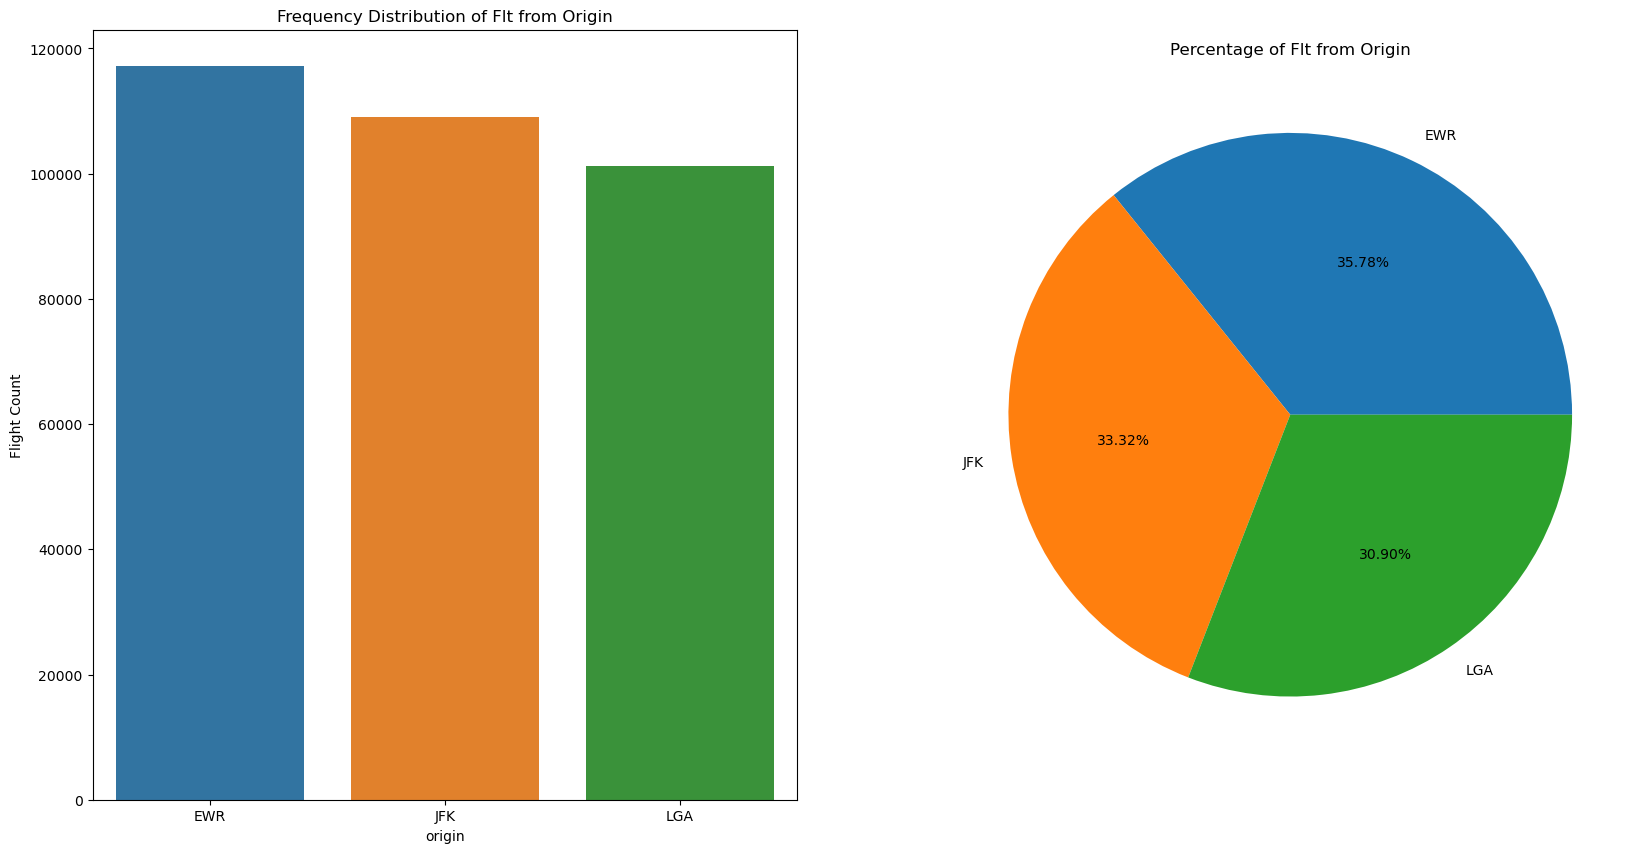

In [18]:
origin_count = df['origin'].value_counts()
f,ax=plt.subplots(1,2,figsize=(20,10))
df['origin'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Percentage of Flt from Origin')
ax[1].set_ylabel('')
sns.countplot('origin',order = df['origin'].value_counts().index, data=df,ax=ax[0])
ax[0].set_title('Frequency Distribution of Flt from Origin')
ax[0].set_ylabel('Flight Count')
plt.show()

 a side-by-side comparison of flight counts and percentages based on their origin. The left subplot shows the number of flights from each origin, and the right subplot displays the percentage distribution of flights based on their origin in a pie chart format. This visualization can provide insights into where most flights originate.

**Lets calculate the number of scheduled arrivals at unique destinations and stores the top 15 destinations with the highest number of scheduled arrivals in the "Destination" variable.**


In [19]:
# Number of scheduled arrival at unique destination

Destination= df['dest'].value_counts().sort_values(ascending=False).head(15)

Destination

ATL    16837
ORD    16566
LAX    16026
BOS    15022
MCO    13967
CLT    13674
SFO    13173
FLL    11897
MIA    11593
DCA     9111
DTW     9031
DFW     8388
RDU     7770
TPA     7390
DEN     7169
Name: dest, dtype: int64

**df['dest'].value_counts():** This line counts the number of occurrences of each unique destination in the 'dest' column of your DataFrame df. This results in a Series with destinations as the index and their respective counts as values.

**.sort_values(ascending=False):** This sorts the Series in descending order based on the counts, so the destinations with the highest number of scheduled arrivals come first.

**.head(15):** This selects the top 15 destinations with the highest counts.

ATL - Hartsfield-Jackson Atlanta International Airport (Atlanta, Georgia, USA)  
ORD - O'Hare International Airport (Chicago, Illinois, USA)    
LAX - Los Angeles International Airport (Los Angeles, California, USA)  
BOS - Logan International Airport (Boston, Massachusetts, USA)  
MCO - Orlando International Airport (Orlando, Florida, USA)  
CLT - Charlotte Douglas International Airport (Charlotte, North Carolina, USA)  
SFO - San Francisco International Airport (San Francisco, California, USA)  
FLL - Fort Lauderdale-Hollywood International Airport (Fort Lauderdale, Florida, USA)  
MIA - Miami International Airport (Miami, Florida, USA)  
DCA - Ronald Reagan Washington National Airport (Washington, D.C., USA)  
DTW - Detroit Metropolitan Wayne County Airport (Detroit, Michigan, USA)  
DFW - Dallas/Fort Worth International Airport (Dallas/Fort Worth, Texas, USA)  
RDU - Raleigh-Durham International Airport (Raleigh-Durham, North Carolina, USA)  
TPA - Tampa International Airport (Tampa, Florida, USA)  
DEN - Denver International Airport (Denver, Colorado, USA)  

C:\Users\aiman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


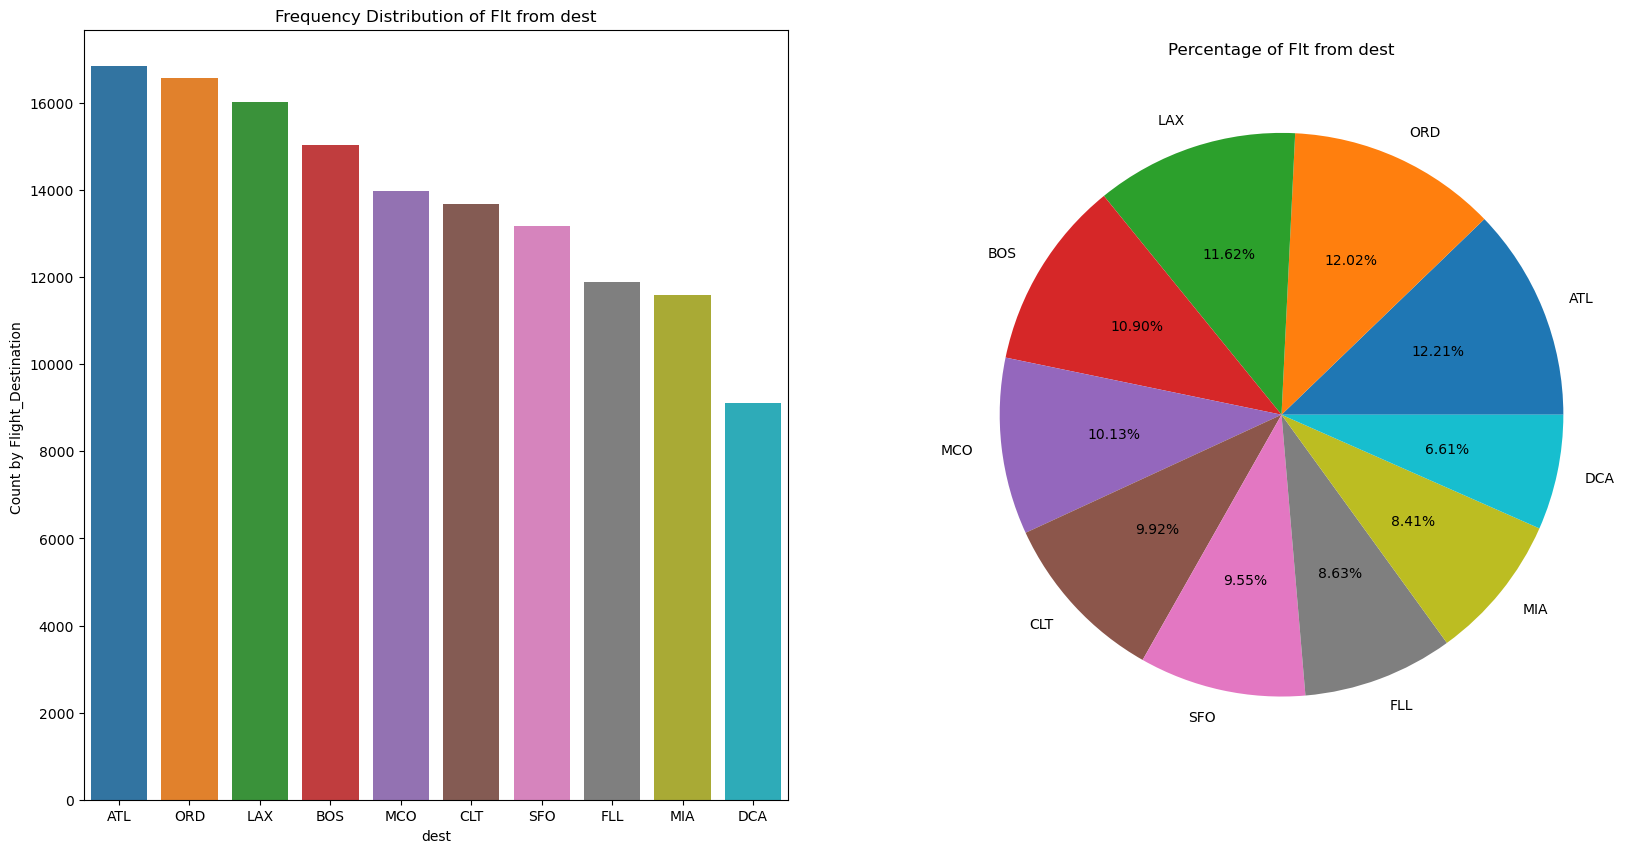

In [20]:
#Top10 destination flight from NYC in bar graph

f,ax=plt.subplots(1,2,figsize=(20,10))
df['dest'].value_counts().head(10).sort_values(ascending=False).plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                
ax[1].set_title('Percentage of Flt from dest')
ax[1].set_ylabel('')
sns.countplot('dest',order = df['dest'].sort_values(ascending=False).value_counts().head(10).index, data=df,ax=ax[0])
ax[0].set_title('Frequency Distribution of Flt from dest')
ax[0].set_ylabel('Count by Flight_Destination ')
plt.show()

#### lets understand bit about delays and arrivals

### A line plot to visualize the changes in the mean departure delay over the months. 

Are there any seasonal patterns in departure delays for flights from NYC?



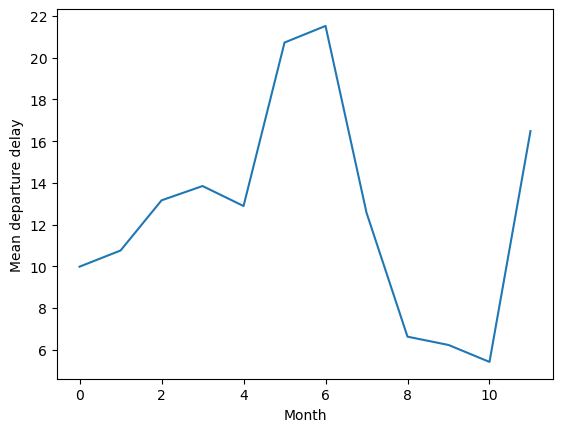

In [21]:
delay_mon_grp = df.groupby(['month'],as_index = False).agg({'dep_delay':'mean'})
delay_mon_grp['dep_delay'].plot()
plt.xlabel('Month')
plt.ylabel('Mean departure delay')
plt.show()

The departure delays shoot up during summer season (May,June) and go up again during the holiday season (Nov,Dec). The delays are compartively very during the months of August to October.

### On average, how do departure delays vary over the course of a day?



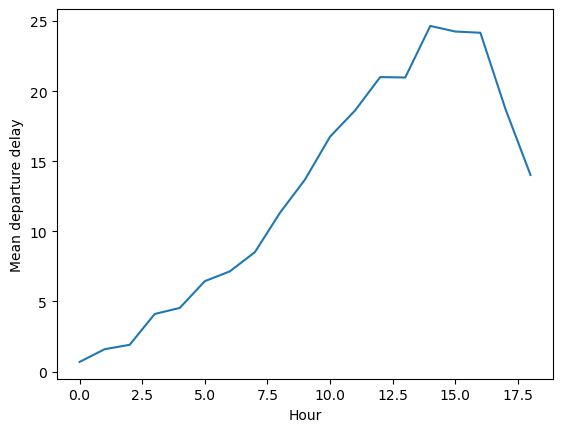

In [22]:
df.loc[df.hour == 24 ,'hour'] = 0
delay_grp = df.groupby(['hour'],as_index = False).agg({'dep_delay':'mean'})
delay_grp['dep_delay'].plot()
plt.xlabel('Hour')
plt.ylabel('Mean departure delay')
plt.show()

#df['dep_delay'].hist(by=df['hour'])

The resulting plot should show how the mean departure delay varies throughout the day, allowing you to see if there are any patterns or trends in departure delays by the hour.

On an average, the departure delays are at a peak during about 15:00 hrs 


#### Which flight departing NYC in 2013 flew the fastest?



In [23]:
# Fastest flight = Flight details with the max speed
# Speed = distance/time = distance in miles/airtime in hr = distance in miles/(airtime in min/60)

df['speed'] = df.distance/(df.air_time/60)
max_speed = max(df['speed'])
df[df['speed']== max_speed]

,year,month,day,dep_delay,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,speed
216447,2013,5,25,9.0,-14.0,DL,1499,N666DN,LGA,ATL,65.0,762,17,0,703.384615


**df['speed'] = df.distance / (df.air_time / 60):** This line calculates the speed for each flight in your DataFrame. It divides the distance in miles by the airtime in minutes (converted to hours by dividing by 60) to get the speed in miles per hour (mph). The result is stored in a new column named 'speed' in your DataFrame.

**max_speed = max(df['speed']):** This line calculates the maximum speed among all flights by finding the maximum value in the 'speed' column.

**df[df['speed'] == max_speed]:** This line filters the DataFrame to select the rows where the 'speed' is equal to the maximum speed, effectively finding the flight(s) with the highest speed in Miles per hour.

The result will be the flight details (all columns) for the flight(s) with the maximum speed.

##### calculates the mean arrival delay for each month and creates a line plot to visualize how the mean arrival delay changes over the months.

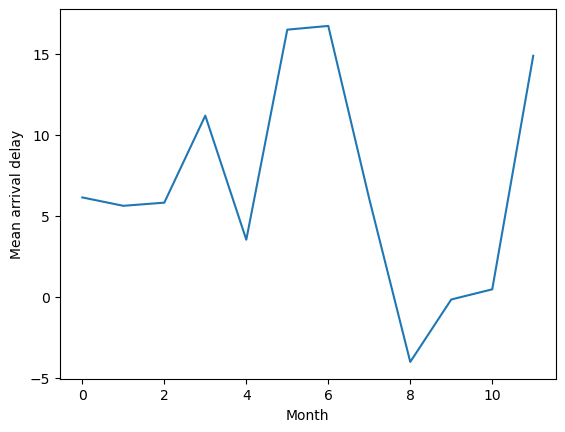

In [24]:
delay_mon_grp = df.groupby(['month'],as_index = False).agg({'arr_delay':'mean'})
delay_mon_grp['arr_delay'].plot()
plt.xlabel('Month')
plt.ylabel('Mean arrival delay')
plt.show()

#### calculates the mean arrival delay for each hour of the day and creates a line plot to visualize how the mean arrival delay changes over the hours.

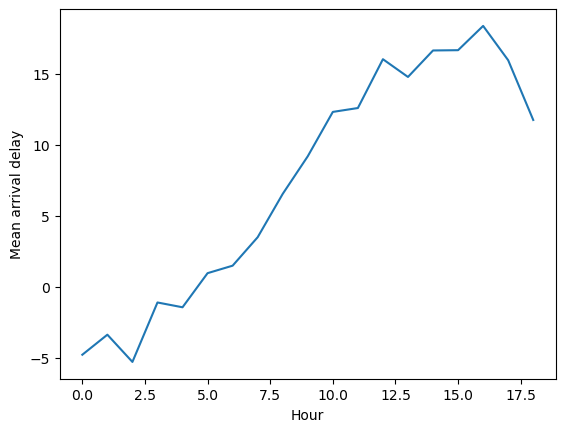

In [25]:
df.loc[df.hour == 24 ,'hour'] = 0
delay_grp = df.groupby(['hour'],as_index = False).agg({'arr_delay':'mean'})
delay_grp['arr_delay'].plot()
plt.xlabel('Hour')
plt.ylabel('Mean arrival delay')
plt.show()

#df['arr_delay'].hist(by=df['hour'])

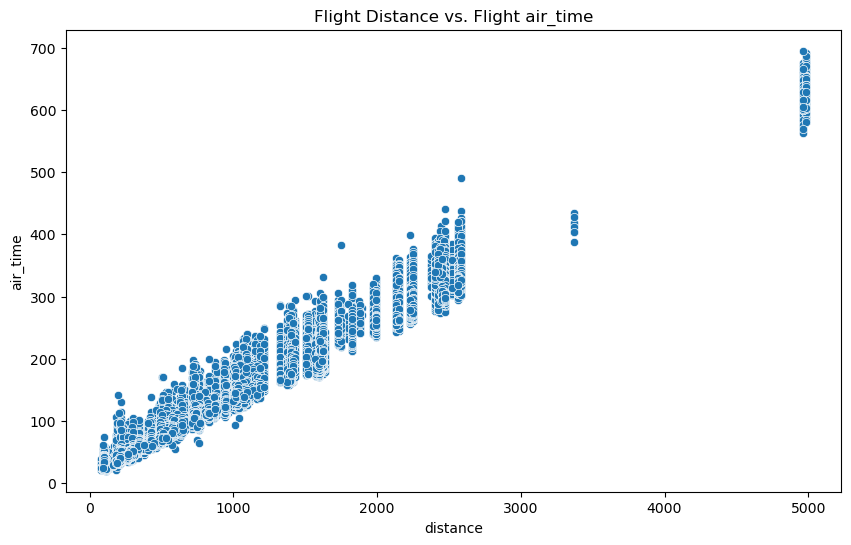

In [55]:
#scatterplot - flight air_time vs flight distance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="distance", y="air_time")
plt.title("Flight Distance vs. Flight air_time")
plt.xlabel("distance")
plt.ylabel("air_time")
plt.show()



The line graph shows a positive correlation between flight distance and flight air time. This means that as the distance of a flight increases, the air time of the flight also increases. This is because airplanes need to travel at a certain speed in order to maintain lift, and this speed is typically higher for longer flights.

The graph also shows that there is a lot of variation in the air time of flights for a given distance. This is because there are a number of factors that can affect flight time, such as wind conditions, aircraft type, and fuel load.

The following are some additional observations about the graph:

The graph appears to be slightly non-linear, with the air time increasing at a slightly faster rate than the distance for longer flights. This could be due to a number of factors, such as the need for airplanes to climb to a higher altitude for longer flights.
There are a few data points that fall above the main trend line. These data points represent flights that took longer than expected, perhaps due to factors such as bad weather or mechanical problems.
There are also a few data points that fall below the main trend line. These data points represent flights that took shorter than expected, perhaps due to factors such as favorable wind conditions.
Overall, the graph provides a good overview of the relationship between flight distance and flight air time. It is important to note that there is a lot of variation in flight time for a given distance, due to a number of factors.

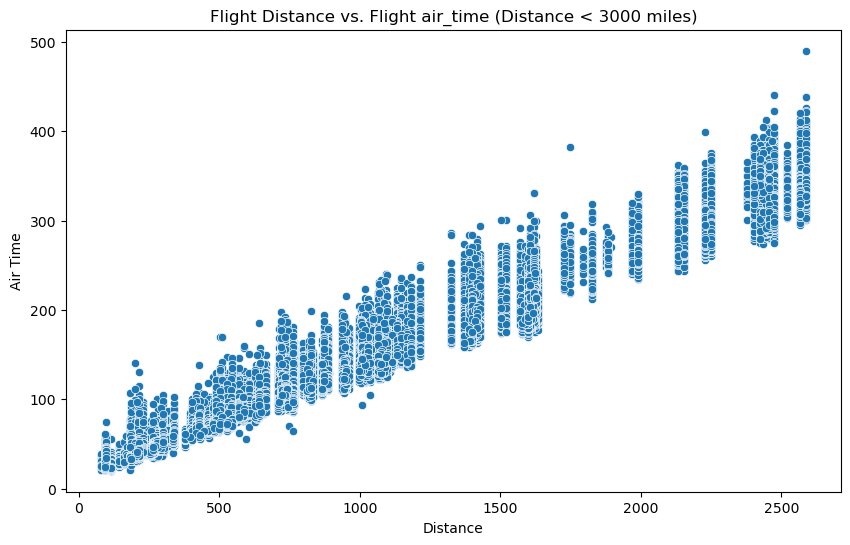

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to keep only rows where the 'distance' is below 3000
filtered_df = df[df['distance'] < 3000]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x="distance", y="air_time")
plt.title("Flight Distance vs. Flight air_time (Distance < 3000 miles)")
plt.xlabel("Distance")
plt.ylabel("Air Time")
plt.show()


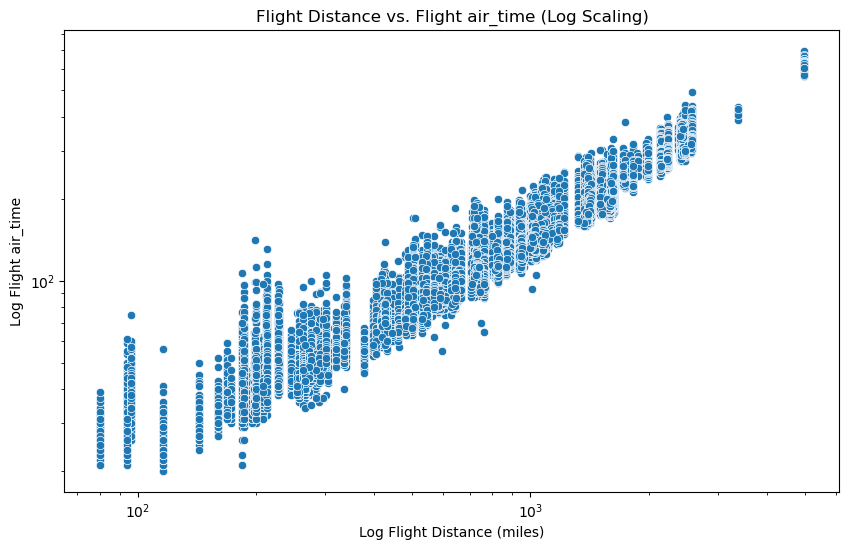

In [53]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="distance", y="air_time")

# Set the x and y axes to use log scaling
plt.xscale('log')
plt.yscale('log')

plt.title("Flight Distance vs. Flight air_time (Log Scaling)")
plt.xlabel("Log Flight Distance (miles)")
plt.ylabel("Log Flight air_time")
plt.show()


In [26]:
#coverting hours into minutes andadding with the minutes column

df['Total Duration (minutes)'] = df['hour'] * 60 + df['minute']


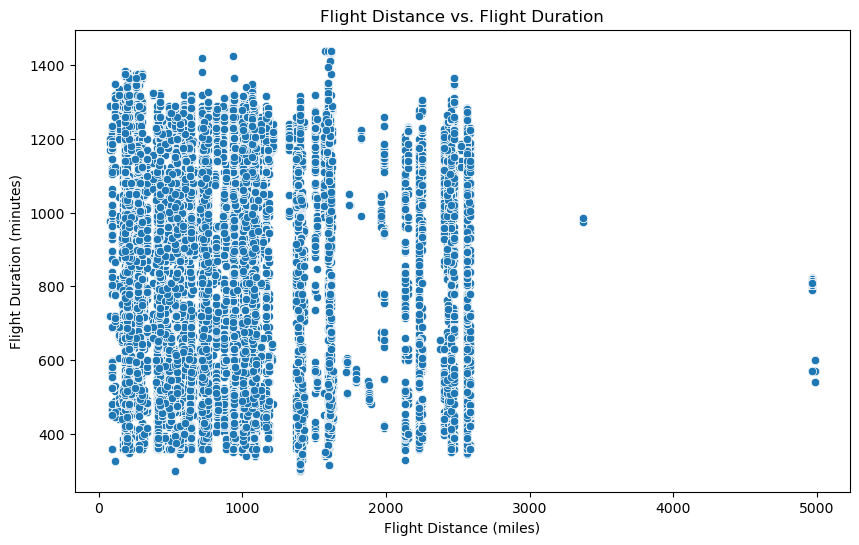

In [27]:
#scatterplot - flight duration vs flight distance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="distance", y="Total Duration (minutes)")
plt.title("Flight Distance vs. Flight Duration")
plt.xlabel("Flight Distance (miles)")
plt.ylabel("Flight Duration (minutes)")
plt.show()


The image shows a scatter plot of flight distance vs. flight duration. This means that each dot on the graph represents a single flight, and the x-axis shows the distance of the flight in miles, while the y-axis shows the duration of the flight in minutes.
As we can see from the graph, there is a strong correlation between flight distance and flight duration. This means that, in general, flights that are longer in distance will also take longer in duration. However, there are also some factors that can affect flight duration, even for flights that are the same distance. These factors can include:

The type of aircraft used
The weather conditions
The routing of the flight
Air traffic control
For example, a flight that is flying against a strong headwind will take longer than a flight that is flying with a tailwind. Additionally, a flight that has to take a more indirect route to avoid bad weather will also take longer.

Despite these factors, the overall trend is that longer flights will take longer. This is because airplanes have a limited cruising speed, and they need to spend more time in the air to cover a longer distance.


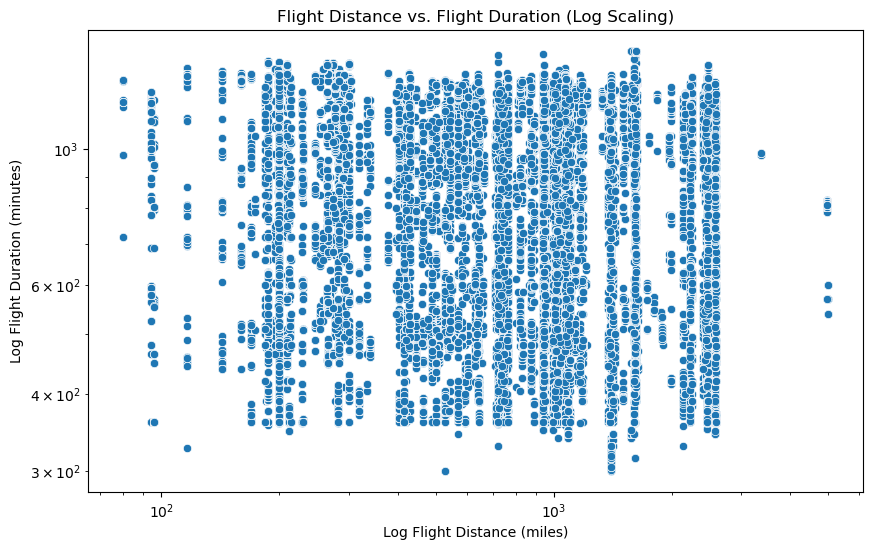

In [47]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="distance", y="Total Duration (minutes)")

# Set the x and y axes to use log scaling
plt.xscale('log')
plt.yscale('log')

plt.title("Flight Distance vs. Flight Duration (Log Scaling)")
plt.xlabel("Log Flight Distance (miles)")
plt.ylabel("Log Flight Duration (minutes)")
plt.show()


In [28]:
df.head()

,year,month,day,dep_delay,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,speed,Total Duration (minutes)
0,2013,1,1,2.0,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,370.044053,315
1,2013,1,1,4.0,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,374.273128,329
2,2013,1,1,2.0,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,408.375000,340
3,2013,1,1,-1.0,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,516.721311,345
4,2013,1,1,-6.0,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,394.137931,360


In [67]:

# Create a copy of the original DataFrame

Tdf = df.copy()

# Dropping the desired columns from the new DataFrame
columns_to_drop = ['carrier', 'tailnum','origin','dest']  
Tdf.drop(columns=columns_to_drop, inplace=True)

# Now we have 'Tdf' with the specified columns dropped


In [68]:
Tdf.head()

,year,month,day,dep_delay,arr_delay,flight,air_time,distance,hour,minute,speed,Total Duration (minutes)
0,2013,1,1,2.0,11.0,1545,227.0,1400,5,15,370.044053,315
1,2013,1,1,4.0,20.0,1714,227.0,1416,5,29,374.273128,329
2,2013,1,1,2.0,33.0,1141,160.0,1089,5,40,408.375000,340
3,2013,1,1,-1.0,-18.0,725,183.0,1576,5,45,516.721311,345
4,2013,1,1,-6.0,-25.0,461,116.0,762,6,0,394.137931,360


### we split our dataset into a training set (X_train, y_train) and a test set (X_test, y_test). Now, let's build a simple linear regression model as an example to predict departure delay (dep_delay) based on the features in your dataset.

In [44]:
from sklearn.model_selection import train_test_split

# Define our features (X) and target variable (y)
X = Tdf.drop(columns=['dep_delay'])  # Features (exclude the departure delay column)
y = Tdf['dep_delay']  # Target variable (departure delay)

# Split the data into a training set and a test set (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can specify a random_state for reproducibility
# The random_state ensures that the split is the same every time you run the code


X contains the features (all columns except 'dep_delay').
y contains the target variable, which is 'dep_delay' in this case.
train_test_split is used to split the data into training and test sets. You can specify the test_size parameter to control the size of the test set (e.g., 0.2 for a 20% test set). The random_state parameter is optional but ensures that the split is the same each time you run the code, making your results reproducible.

We import the necessary libraries, including scikit-learn's LinearRegression for building a linear regression model and metrics for evaluation.

We create a linear regression model (model) using LinearRegression(). 

We train the model using the training data (X_train and y_train) with the fit() method.

We make predictions on the test data (X_test) using the predict() method.

We evaluate the model's performance using mean squared error (MSE) and R-squared (R2) as metrics. These metrics assess how well the model fits the data and predicts departure delays.

What we are trying to find out with this split and modeling is how well your chosen machine learning model can predict departure delays based on the selected features in your dataset. Mean squared error (MSE) measures the average squared difference between predicted and actual departure delays, and R-squared (R2) indicates the proportion of the variance in the target variable (departure delay) that is predictable from the features.

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load your dataset if you haven't already
# Replace 'your_dataset.csv' with the actual path to your dataset file
# df = pd.read_csv('your_dataset.csv')

# Assuming you have split your dataset into X_train, y_train, X_test, and y_test

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Optionally, you can also print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error (MSE): 202.91
Root Mean Squared Error (RMSE): 14.24
Mean Absolute Error (MAE): 10.13
R-squared (R2) Score: 0.87
Coefficients: [ 0.00000000e+00 -2.11657739e-01 -3.84476911e-03  8.50706709e-01
  2.82105472e-04 -5.45085626e-01  6.99393773e-02  3.72518688e-05
  2.20196422e-03  2.05032133e-02  4.43707635e-03]
Intercept: 4.645197418854826



1. **Mean Squared Error (MSE)**: The MSE is a measure of the average squared difference between the actual (observed) values and the predicted values made by our regression model. In this case, our model has an MSE of approximately 202.91. Lower MSE values indicate better model performance, meaning that, on average, our model's predictions are relatively close to the actual values.  


2. **Root Mean Squared Error (RMSE)**: The RMSE is the square root of the MSE and is expressed in the same units as the target variable (in this case, likely minutes for departure delay). The RMSE value of approximately 14.24 indicates that, on average, our model's predictions have an error of approximately 14.24 minutes from the actual departure delay times.


3. **Mean Absolute Error (MAE)**: The MAE is another measure of the average absolute difference between the actual and predicted values. An MAE of approximately 10.13 means that, on average, our model's predictions are off by about 10.13 minutes from the actual departure delays.


4. **R-squared (R2) Score**: The R-squared score measures the proportion of the variance in the target variable (departure delay) that is explained by our model. An R2 score of 0.87 indicates that our model explains approximately 87% of the variance in departure delay. In other words, it suggests that our model is a good fit for the data, as it captures a substantial portion of the variability in departure delays.


5. **Coefficients**: The coefficients represent the estimated relationships between the independent variables (features) and the target variable (departure delay). Each coefficient corresponds to a specific feature. For example, the coefficient of -2.11657739e-01 for one of the features suggests that a one-unit increase in that feature is associated with a decrease of approximately 0.21 minutes in departure delay, assuming all other variables are held constant.


6. **Intercept**: The intercept (4.645197418854826) represents the estimated departure delay when all the independent variables are zero. In most cases, this value might not have a straightforward interpretation, as it depends on the context and scaling of our features.


Overall, the metrics (MSE, RMSE, MAE, and R2) indicate that our linear regression model is performing reasonably well. It explains a substantial portion of the variance in departure delay, and the errors in its predictions are relatively small on average. The coefficients provide insights into the relationships between features and departure delay, indicating which factors have a positive or negative impact on delays.


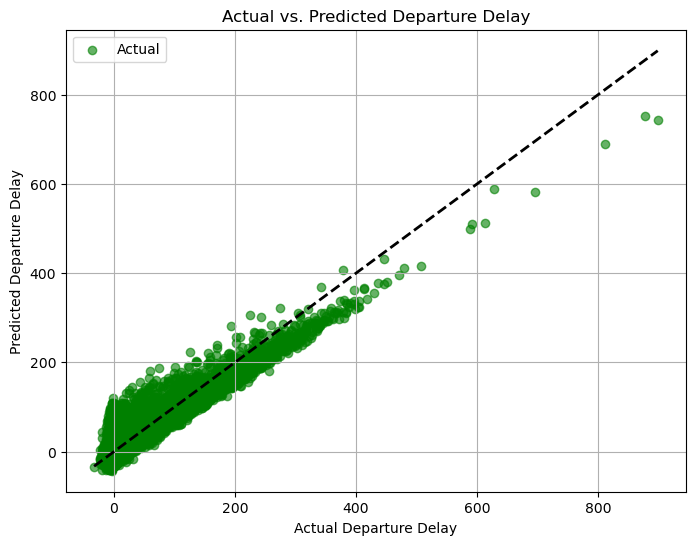

In [49]:


# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='green', label='Actual', alpha=0.6)  # Blue for actual values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Departure Delay')
plt.ylabel('Predicted Departure Delay')
plt.title('Actual vs. Predicted Departure Delay')
plt.legend()
plt.grid(True)
plt.show()


The graph shows that there is a generally positive correlation between the actual and predicted departure delays. This means that flights with longer actual departure delays also tend to have longer predicted departure delays. However, there is also a lot of scatter in the data, meaning that there are many flights with actual departure delays that are significantly different from their predicted departure delays.

One possible explanation for this scatter is that the model used to predict departure delays is not perfect. It is likely that the model does not take into account all of the factors that can affect departure delays, such as weather, air traffic control, and mechanical problems.

Another possible explanation for the scatter is that there are some flights that experience unexpected delays or cancellations. For example, a flight may be delayed due to a medical emergency on board, or it may be cancelled due to severe weather.

Overall, the graph shows that the model used to predict departure delays is generally accurate, but it is important to keep in mind that there will always be some flights with actual departure delays that are significantly different from their predicted departure delays.

Here are some additional observations about the graph:

The majority of the points on the graph fall below the diagonal line. This means that the predicted departure delays are generally lower than the actual departure delays.
There are a few points on the graph that fall far above the diagonal line. These points represent flights with actual departure delays that were much longer than predicted.
There is a slight trend of the points clustering towards the top right corner of the graph. This suggests that the model may be slightly overestimating the departure delays for flights with longer actual departure delays.


Above the diagonal line:
A flight that is cancelled due to severe weather.
A flight that is delayed due to a medical emergency on board.
A flight that is delayed due to mechanical problems that were not detected before takeoff.
Below the diagonal line:
A flight that is able to take off early due to favorable weather conditions.
A flight that is able to make up time in the air due to a strong tailwind.
A flight that is able to land early due to light air traffic.


In [61]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = Tdf.drop(columns=['arr_delay'])  # Features (exclude the arrival delay column)
y = Tdf['arr_delay']  # Target variable (arrival delay)

# Split the data into a training set and a test set (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can specify a random_state for reproducibility
# The random_state ensures that the split is the same every time you run the code


In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load your dataset if you haven't already
# Replace 'your_dataset.csv' with the actual path to your dataset file
# df = pd.read_csv('your_dataset.csv')

# Assuming you have split your dataset into X_train, y_train, X_test, and y_test

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Optionally, you can also print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error (MSE): 244.92
Root Mean Squared Error (RMSE): 15.65
Mean Absolute Error (MAE): 11.21
R-squared (R2) Score: 0.88
Coefficients: [ 0.00000000e+00  2.11337208e-01  5.30746265e-03  1.02136703e+00
 -1.30702900e-04  6.45198733e-01 -8.29117146e-02 -1.97918903e-06
 -7.43682563e-04 -2.07144655e-02 -8.62433905e-04]
Intercept: -8.55436259873209



1. **Mean Squared Error (MSE): 244.92**
   - MSE is a measure of how well our regression model's predictions match the actual values.
   - In this case, an MSE of 244.92 means that, on average, our model's predictions have a squared error (difference) of 244.92 from the actual values.
   - Lower MSE values indicate better model performance, but the scale of MSE depends on the units of our target variable.

2. **Root Mean Squared Error (RMSE): 15.65**
   - RMSE is the square root of the MSE and is in the same units as our target variable.
   - An RMSE of 15.65 means that, on average, our model's predictions have an error of approximately 15.65 minutes when predicting departure delay.
   - Just like with MSE, lower RMSE values indicate better model performance.

3. **Mean Absolute Error (MAE): 11.21**
   - MAE is another measure of prediction error, but it doesn't square the errors, so it's less sensitive to outliers.
   - An MAE of 11.21 means that, on average, our model's predictions have an absolute error (absolute difference) of approximately 11.21 minutes from the actual values.
   - Like MSE and RMSE, lower MAE values indicate better model performance.

4. **R-squared (R2) Score: 0.88**
   - R2 score measures how well our model explains the variance in the target variable.
   - An R2 score of 0.88 means that our model explains about 88% of the variability in departure delay based on the features used.
   - R2 scores range from 0 to 1, where 0 indicates that the model doesn't explain any variance, and 1 indicates a perfect fit. An R2 score closer to 1 is desirable.

5. **Coefficients:** These are the coefficients associated with each feature in our linear regression model.
   - Each coefficient represents the change in the target variable (departure delay) for a one-unit change in the corresponding feature, holding all other features constant.
   - For example, if you have a coefficient of 0.2113 for a feature, it means that a one-unit increase in that feature is associated with an increase of 0.2113 minutes in departure delay, assuming all other factors remain the same.

6. **Intercept: -8.55436259873209**
   - The intercept is the value of the target variable (departure delay) when all the predictor variables are zero.
   - In this case, it represents the departure delay when all other factors are zero. However, in practical terms, it may not have a meaningful interpretation, depending on our dataset.

Overall, the MSE, RMSE, MAE, and R2 score provide insights into how well our linear regression model is performing, while the coefficients and intercept help understand the relationships between the features and the target variable. In this case, our model seems to have relatively good performance (low MSE, RMSE, and MAE) and explains a significant portion of the variance (high R2 score) in departure delay based on the given features.


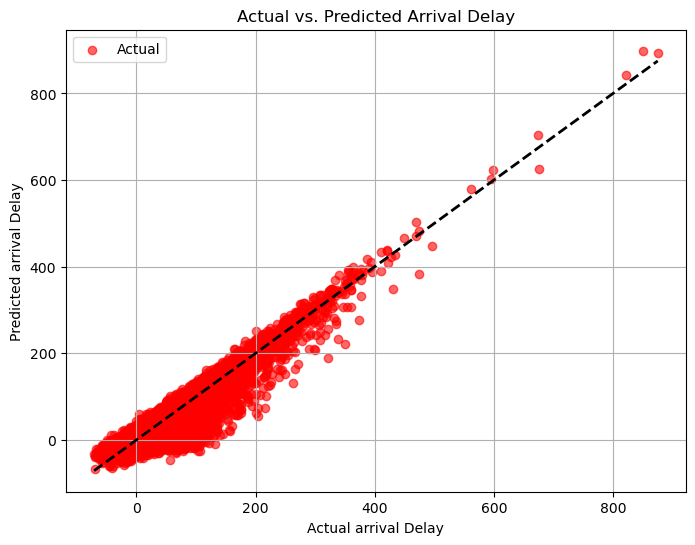

In [66]:


# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='red', label='Actual', alpha=0.6)  # Blue for actual values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual arrival Delay')
plt.ylabel('Predicted arrival Delay')
plt.title('Actual vs. Predicted Arrival Delay')
plt.legend()
plt.grid(True)
plt.show()



The scatter plot of actual vs predicted arrival delay shows that the predicted arrival delays are generally lower than the actual arrival delays. This means that the model is underpredicting the arrival delays, which could be due to a number of factors, such as:

The model is not complex enough to capture all of the factors that contribute to arrival delays.
The model is trained on historical data, which may not be representative of current conditions.
The model is trained on incomplete data.
Despite the underprediction, the model still appears to be able to capture the general trend of the arrival delays. This is evidenced by the fact that the points are clustered around the diagonal line, which represents perfect prediction.

There are a few data points that are significantly below the diagonal line. These data points represent flights that were delayed much more than the model predicted. It is important to investigate these data points to understand why the model underpredicted the arrival delays.
There is a slight trend for the predicted arrival delays to increase as the actual arrival delays increase. This suggests that the model is better at predicting larger arrival delays than smaller arrival delays.